In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
%matplotlib inline

# Read in data:
- Monthly HES data for Circulatory and Respiratory disease for LSOA's
- MAIAC mean monthly PM2.5 estimates for LSOA's

## Merge the data based on year, month and LSOA

In [3]:
Circulatory_monthly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_monthly_all.csv')

In [4]:
Circulatory_monthly = Circulatory_monthly[['Disease', 'year', 'month', 'n', 'DSR', 'lcl', 'ucl', 'score', 'rank', 'decile', 'lsoa11']]

In [5]:
Respiratory_monthly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_monthly_all.csv')

In [6]:
Respiratory_monthly = Respiratory_monthly[['Disease', 'year', 'month', 'n', 'DSR', 'lcl', 'ucl', 'score', 'rank', 'decile', 'lsoa11']]

In [7]:
AP_Monthly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\Monthly_PM25_LSOA.csv')

In [8]:
AP_Monthly = AP_Monthly.rename(columns={'LSOA':'lsoa11', 'value':'PM25'})

In [9]:
AP_Monthly = AP_Monthly[['time', 'lsoa11', 'PM25', 'month', 'year']].dropna()

In [10]:
Circ_AP = pd.merge(Circulatory_monthly, AP_Monthly, on=['year', 'month','lsoa11'], how='inner')

In [11]:
Resp_AP = pd.merge(Respiratory_monthly, AP_Monthly, on=['year', 'month','lsoa11'], how='inner')

In [13]:
Circ_AP[:5]

Disease  year  month   n         DSR        lcl         ucl  \
0  All Circulatory  2009      1 NaN   69.247604   8.247776  250.557617   
1  All Circulatory  2009      1 NaN  147.841522   3.743035  823.720154   
2  All Circulatory  2009      1 NaN  187.446503  38.159660  549.000244   
3  All Circulatory  2009      1 NaN  309.000488  59.781487  912.577209   
4  All Circulatory  2009      1 NaN  162.742996  15.881656  599.259460   

       score   rank  decile     lsoa11        time       PM25  
0  11.430000  22492       7  E01015272  2009-01-31  11.609479  
1  33.619999   6665       3  E01015273  2009-01-31  11.410336  
2  20.290001  13991       5  E01015274  2009-01-31  11.650494  
3  19.780001  14447       5  E01015275  2009-01-31  11.682238  
4  26.400000  10063       4  E01015276  2009-01-31  11.347145

## Stratify Deprivation Score

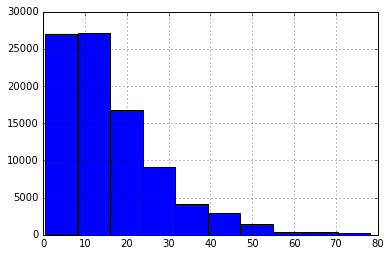

In [14]:
Circ_AP.score.hist()

In [15]:
Circ_AP.score.min()

0.579999983

In [16]:
Circ_AP['Depr_cat'] = pd.cut(Circ_AP.score, [0,10,20,80])

In [17]:
Circ_AP[:5]

Disease  year  month   n         DSR        lcl         ucl  \
0  All Circulatory  2009      1 NaN   69.247604   8.247776  250.557617   
1  All Circulatory  2009      1 NaN  147.841522   3.743035  823.720154   
2  All Circulatory  2009      1 NaN  187.446503  38.159660  549.000244   
3  All Circulatory  2009      1 NaN  309.000488  59.781487  912.577209   
4  All Circulatory  2009      1 NaN  162.742996  15.881656  599.259460   

       score   rank  decile     lsoa11        time       PM25  Depr_cat  
0  11.430000  22492       7  E01015272  2009-01-31  11.609479  (10, 20]  
1  33.619999   6665       3  E01015273  2009-01-31  11.410336  (20, 80]  
2  20.290001  13991       5  E01015274  2009-01-31  11.650494  (20, 80]  
3  19.780001  14447       5  E01015275  2009-01-31  11.682238  (10, 20]  
4  26.400000  10063       4  E01015276  2009-01-31  11.347145  (20, 80]

In [18]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=Circ_AP).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [19]:
res = Circ_AP.groupby('Depr_cat').apply(do_regression)

In [20]:
res

Intercept      PM25            r2
Depr_cat                                   
(0, 10]    185.3637  0.020298  4.344388e-07
(10, 20]   185.3637  0.020298  4.344388e-07
(20, 80]   185.3637  0.020298  4.344388e-07

In [21]:
Resp_AP['Depr_cat'] = pd.cut(Resp_AP.score, [0,10,20,80])

In [22]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=Resp_AP).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [23]:
resp_res = Resp_AP.groupby('Depr_cat').apply(do_regression)

In [24]:
resp_res

Intercept     PM25        r2
Depr_cat                              
(0, 10]   185.49779 -1.82106  0.003705
(10, 20]  185.49779 -1.82106  0.003705
(20, 80]  185.49779 -1.82106  0.003705

## Yearly

In [25]:
Circ_Yearly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllCirculatory_yearly_all.csv')

In [26]:
Resp_Yearly = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\HES\AllRespiratory_yearly_all.csv')

In [27]:
AP_Yearly = pd.read_csv('D:\Annies_Dissertation\Analysis\Regression\Yearly_PM25_LSOA.csv')

In [28]:
AP_Yearly = AP_Yearly.rename(columns={'LSOA':'lsoa11', 'value':'PM25'})

In [29]:
AP_Yearly = AP_Yearly[['time', 'lsoa11', 'PM25', 'year']].dropna()

In [30]:
Circul_AP_Y = pd.merge(Circ_Yearly, AP_Yearly, on=['year','lsoa11'], how='inner')

In [31]:
Respir_AP_Y = pd.merge(Resp_Yearly, AP_Yearly, on=['year','lsoa11'], how='inner')

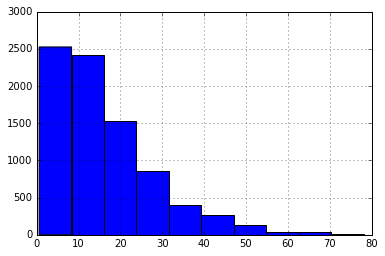

In [32]:
Circul_AP_Y.score.hist()

In [33]:
Circul_AP_Y['Depr_cat'] = pd.cut(Circul_AP_Y.score, [0,10,20,80])

In [34]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=Circul_AP_Y).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [35]:
res = Circul_AP_Y.groupby('Depr_cat').apply(do_regression)

In [36]:
res

Intercept       PM25        r2
Depr_cat                                  
(0, 10]   1520.132096  24.154825  0.004599
(10, 20]  1520.132096  24.154825  0.004599
(20, 80]  1520.132096  24.154825  0.004599

In [37]:
Respir_AP_Y['Depr_cat'] = pd.cut(Respir_AP_Y.score, [0,10,20,80])

In [38]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=Respir_AP_Y).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [39]:
res = Respir_AP_Y.groupby('Depr_cat').apply(do_regression)

In [40]:
res

Intercept       PM25        r2
Depr_cat                                  
(0, 10]   1404.586836  11.800434  0.000908
(10, 20]  1404.586836  11.800434  0.000908
(20, 80]  1404.586836  11.800434  0.000908

## Stratify by PM2.5

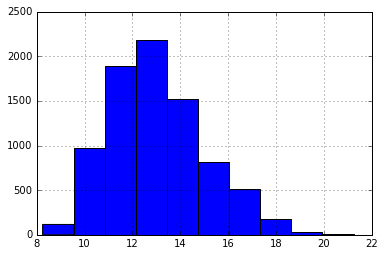

In [41]:
Circul_AP_Y.PM25.hist()

In [47]:
Circul_AP_Y['PM25_cat'] = pd.cut(Circul_AP_Y.PM25, [0,12,16,22])

In [44]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=Circul_AP_Y).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [48]:
res = Circul_AP_Y.groupby('PM25_cat').apply(do_regression)

In [49]:
res

Intercept       PM25        r2
PM25_cat                                  
(0, 12]   1520.132096  24.154825  0.004599
(12, 16]  1520.132096  24.154825  0.004599
(16, 22]  1520.132096  24.154825  0.004599

In [50]:
Respir_AP_Y['PM25_cat'] = pd.cut(Respir_AP_Y.PM25, [0,12,16,22])

In [51]:
def do_regression(df):
    # This is just the standard code for doing the regression
    model = ols('DSR ~ PM25', data=Respir_AP_Y).fit()
    
    # Here we take the 'params' attribute of the model, which contains the values
    # for the intercept and the coefficients for each of the inputs.
    # We convert it to a dict to make it easier to work with (and so they are labelled
    # with which one is which)
    results = model.params.to_dict()
    
    # We then add an extra entry to the dict containing the r2 value
    results['r2'] = model.rsquared
    
    # We then return a 'Series' created from the dict - a Series is basically a column or a row
    # of a pandas DataFrame - so here it is a row containing the intercept, the coefficient for 'b'
    # and the r2 value
    return pd.Series(results)

In [52]:
res = Respir_AP_Y.groupby('PM25_cat').apply(do_regression)

In [53]:
res

Intercept       PM25        r2
PM25_cat                                  
(0, 12]   1404.586836  11.800434  0.000908
(12, 16]  1404.586836  11.800434  0.000908
(16, 22]  1404.586836  11.800434  0.000908